In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [28]:
df = pd.read_csv('../../regression-problem/imputed_data.csv')
y = df['y']
X = df.drop(columns=['y', 'id', 'Unnamed: 0'])

In [67]:
test_df = pd.read_csv('test.csv')

In [11]:
np.unique(df['y'])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  53.,  54.,  55.,  57.,
        58.,  59.,  60.,  61.,  62.,  64.,  65.,  68.,  69.,  70.,  71.,
        72.,  74.,  77.,  78.,  79.,  81.,  83.,  84.,  89.,  90.,  92.,
        94.,  95.,  99., 100.])

(array([4163.,  765.,  223.,   89.,   50.,   23.,   19.,   10.,    8.,
          30.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

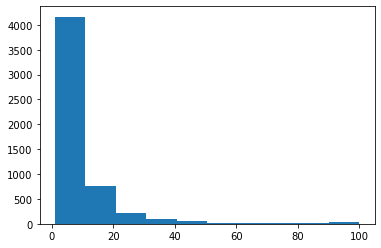

In [12]:
plt.hist(df['y'])

In [18]:
explained_ratio = 0
pca = PCA(n_components=1)
i = 1
while explained_ratio < 0.95:
    pca = PCA(n_components=i)
    pca.fit(X)
#     print(pca.explained_variance_ratio_)
    i += 1
    explained_ratio = sum(pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)

Number of components: 1


In [30]:
pca = PCA(1)
pca.fit(X)
np.sum(pca.explained_variance_ratio_)

0.9989820364839593

In [32]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)

/Users/pdhanoa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.429e+05, tolerance: 7.767e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [64]:
coeff = np.abs(clf.coef_)
print(max(coeff))
print(min(coeff))


2.446586803657529
0.0


In [65]:
X.columns[coeff > 0.5]

Index(['x003', 'x014', 'x168', 'x253', 'x317', 'x360', 'x526', 'x567', 'x669',
       'x724'],
      dtype='object')

In [69]:
lasso_imp = X.columns[coeff > 0.5]
lasso_imp

Index(['x003', 'x014', 'x168', 'x253', 'x317', 'x360', 'x526', 'x567', 'x669',
       'x724'],
      dtype='object')

In [71]:
df[lasso_imp]

,x003,x014,x168,x253,x317,x360,x526,x567,x669,x724
0,7.76,4.82,7.19,3.725,-0.600000,1.11,5.08,9.0,5.72,6.0
1,5.37,4.00,6.04,1.845,0.000000,0.00,2.00,9.0,4.00,4.0
2,5.77,6.62,5.67,3.780,1.250000,0.89,3.39,9.0,6.85,7.0
3,5.86,5.60,6.69,4.055,0.000000,1.01,4.27,10.0,5.67,6.0
4,7.52,2.43,5.63,7.240,1.000000,0.94,3.14,10.0,5.45,14.0
...,...,...,...,...,...,...,...,...,...,...
5375,6.73,10.88,6.42,2.310,1.060000,0.65,5.34,8.0,8.00,4.0
5376,6.96,5.40,6.83,1.935,0.950000,0.73,2.70,9.0,5.13,4.0
5377,6.36,4.58,6.77,8.330,0.980000,-0.67,2.87,9.0,5.57,15.0
5378,7.80,5.68,7.17,4.815,1.170000,0.74,3.17,10.0,6.09,10.0


In [72]:
test_df[lasso_imp]

,x003,x014,x168,x253,x317,x360,x526,x567,x669,x724
0,6.82,4.83,6.22,2.565,0.82,0.79,3.80,9,5.63,7
1,8.17,3.50,7.71,3.375,-0.88,0.82,1.70,9,3.67,7
2,7.15,2.93,7.52,3.235,0.76,0.75,4.23,8,5.89,6
3,6.53,2.68,7.54,4.005,-0.67,1.19,4.02,8,4.86,8
4,6.39,6.75,6.21,0.780,-1.06,1.02,4.55,7,4.25,2
...,...,...,...,...,...,...,...,...,...,...
4398,5.27,3.50,5.92,1.655,0.00,0.00,1.50,9,3.50,3
4399,6.18,5.01,6.51,5.500,0.80,0.95,3.77,7,5.38,11
4400,6.74,4.00,7.00,6.600,0.90,0.00,0.82,10,4.00,12
4401,6.47,8.85,6.50,4.585,0.90,0.93,4.00,9,6.24,7


In [75]:
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X=df[lasso_imp], y=y)
pred = model.predict(test_df[lasso_imp])

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [34]:
pd.read_csv('train.csv')

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.0000,158603315,0.05,0.0,0,0.0,2.7480,93.45,0.22,4
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.0003,36089167,0.01,6.0,4,4.0,23.6890,76.05,-0.90,8
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.0057,1786891,0.53,44.0,0,28.0,4.3710,80.30,-0.70,21
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,0.0001,194000000000,0.29,3.0,2,2.0,24.6594,7.95,0.47,13


In [35]:
pd.read_csv('test.csv')

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,5380,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,...,0.0380,0.0010,90204869909,0.26,8.0,5,5.0,30.1213,27.95,-0.49
1,5381,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,...,0.1866,0.0192,37449565014,0.02,16.0,1,8.0,2.1282,10.18,0.55
2,5382,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,...,0.0100,0.0017,10847937619,0.83,35.0,1,19.0,7.8513,21.27,19.09
3,5383,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,...,0.4636,0.0000,37200096,0.51,1.0,4,0.0,9.0511,18.38,4.11
4,5384,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,...,2.8737,0.0001,16400000000000,0.12,2.0,1,2.0,2.6512,149.68,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,9778,3.217682e+09,2214.42,5.27,0.00010,1.608841e+09,0.00,520766.78,172141.0,1307.0,...,0.0771,0.0095,31446931515,0.74,0.0,0,0.0,1.6431,22.42,NaN
4399,9779,3.042820e+10,14279.29,6.18,0.00135,1.901762e+09,0.33,1634334.25,1420919.0,826.0,...,0.2828,0.0000,18200000000000,0.42,0.0,2,0.0,12.3538,68.09,-0.43
4400,9780,8.556628e+09,7518.26,6.74,0.00005,2.852209e+09,0.00,559939.70,911940.0,105542.0,...,0.2890,0.0010,551000000000,0.67,25.0,1,9.0,2.5226,29.27,0.32
4401,9781,7.384902e+10,2556.73,6.47,0.00140,1.605414e+09,0.25,186175.29,236336.0,655488.0,...,0.5227,0.0127,20500000000000,0.67,142.0,6,56.0,32.7632,10.22,-0.75


In [68]:
clf.predict(test_df.drop(columns=['id']))

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [54]:
coeff = df.corr()

# 0.3 is used for illustration 
# replace with your actual value
thresh = 0.3

mask = coeff.abs().gt(thresh)
# or mask = coeff < thresh


In [55]:
coeff.where(mask).stack()

Unnamed: 0  Unnamed: 0    1.000000
            id            1.000000
id          Unnamed: 0    1.000000
            id            1.000000
x001        x001          1.000000
                            ...   
y           x687          0.343842
            x696          0.329630
            x755          0.324916
            x756          0.312251
            y             1.000000
Length: 64905, dtype: float64

In [63]:
coeff['y'][coeff['y'].abs().gt(0.3)]

x014    0.364737
x096   -0.315185
x102    0.378436
x146    0.378696
x543    0.308728
x569    0.311497
x581    0.346538
x619    0.344101
x651    0.329630
x687    0.343842
x696    0.329630
x755    0.324916
x756    0.312251
y       1.000000
Name: y, dtype: float64

In [58]:
\

,Unnamed: 0,id,x001,x002,x003,x004,x005,x006,x007,x008,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
Unnamed: 0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
id,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
x001,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
x002,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
x003,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x762,False,False,False,False,False,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,False
x763,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
x764,False,False,False,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
x765,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
